# Representation of a Design Problem and Fundamentals of Optimal Design

*Written by Marc Budinger (INSA Toulouse), Toulouse, France*

So far, we have worked on:
- Building scenarios and mission profiles to capture main design constraints.
- Developing simulation, evaluation, and estimation models to calculate usage technological constraints and component characteristics.

In the next steps, we must choose the appropriate components by optimizing our solutions (in terms of mass or dimensions) while respecting various constraints (speed, temperature, etc.).

```{figure} ./assets/images/SizingProcedureOptimization.png
---
alt: Sizing Procedure and Optimization
name: SizingProcedureOptimization
---
Sizing Procedure and Optimization
```

For readers interested in more background, especially on design graphs and optimization problem definitions, refer to Chapter 5 – Design graphs for sizing procedures and optimization problems definition:
> Budinger, M. (2014). Preliminary design and sizing of actuation systems (HDR dissertation, UPS Toulouse). [Link](https://hal.science/tel-01112448v1/document)


### Preliminary Design: An Inverse Problem

Preliminary design is an inverse problem because we select system components based on desired performance. The models usually tell us how components’ characteristics affect overall performance.

```{figure} ./assets/images/InversePb.png
---
alt: Sizing Procedure and Optimization
name: InversePb
---
Sizing Procedure and Optimization
```


### Solving an inverse problem

There are essentially two ways to handle an inverse problem:
- Strategic selection and sizing procedures, which use a sequence of calculations and verifications. Iterations are achieved by the designer ({numref}`HarmonicDriveSelection`).
- Numerical optimization, which determines the design variable values to reduce the difference between achieved performance and required performance which are implemented in a form of an objective and constraints. Iterations are achieved by the optimizer ({numref}`numerical_optimization_process`).

```{figure} ./assets/images/HarmonicDriveSelection.png
---
alt: Sizing Procedure and Optimization
width: 50%
name: HarmonicDriveSelection
---
Sizing Procedure of an Harmonic Drive
```

```{figure} ./assets/images/numerical_optimization_process.png
---
alt: Numerical Optimization Process
width: 50%
name: numerical_optimization_process
---
Numerical optimization process
```

By combining these approaches, we can have a comprehensive and automated design optimization process.

### Sizing Procedure Representations

These graphical methods (causal diagrams, N² diagrams, or more general graph representations) help identify couplings, potential algebraic loops, and overall process flow.


#### Causal Diagram

The causal diagram is a graphical tool representing the causal relationships between variables. It is, in fact, an oriented graph representing a calculation scheme. Figures below give examples of causal diagrams used in the Salome platform for the Pre- and Post-Processing of numerical simulations or for a space envelope estimation.

```{figure} ./assets/images/CausalDiagrams.png
---
alt: Causal Diagrams
name: CausalDiagrams
---
Causal Diagrams
```


With causal diagrams, ensuring no circular references is key. If loops exist, methods include:
- Avoid loops in the first place.
- Solve coupled equations analytically.
- Use a numerical solver internally or within an optimization routine.

For the latter, two implementations are possible. In the first, the numerical solver used is internal to the calculation procedure and its computer support. This sizing procedure is difficult to export to other optimization or calculation tools, however.
For the second implementation, the code generated, which corresponds to the sizing procedure, postpones the task of numerical solver to the optimization algorithm. It is then necessary to add design parameters and additional constraints in the optimization problem to manage these algebraic loops. This is the preferred solution in this course.

#### N² Diagram

This diagram arranges inputs and outputs with blocks on a diagonal. It spotlights couplings and loops between components.

```{figure} ./assets/images/N2diagram.png
---
alt: N2 Diagram
name: N2diagram
---
N2 Diagram
```


The N2 diagram formalisms were introduced in the 1970s by the system engineer Robert J. Lano. N is the number of entities considered. The inputs of the blocks are represented by vertical arrows while the outputs must be horizontal arrows. This display provides a quick visual summary of the organization of the system studied. In particular, the couplings and algebraic loops between blocks are easily identifiable, for example when a block "2" provides an input to block "3" and block "3" provides an input to block "2".

#### Graphs

A sizing procedure can be viewed as a constraint network. Graph theory techniques are used to match equations and parameters.

```{figure} ./assets/images/GraphExample.PNG
---
alt: Graph Example
name: GraphExample
---
Graph Example
```


Graphics above represent how equations match parameters. Let us take the equation (declarative equation, not imperative assignment) of Figure a, to show these representations:
a. in which case equations (square node) and non-determined parameters (circular node) are represented in a non-oriented graph.
b. matching is generally represented in what is called a bi-partite graph: with all the equation nodes on one side and on all the non-determined parameter nodes on the other side. A matching parameter/equation is then represented by a double-column.
c. once equations are oriented (one parameter is matched to the equation, i.e., is calculated by the equation), a simplified graph can be drawn with no more equation nodes.


### Sizing as an Optimization Problem

Define an objective function, equality and inequality constraints, and design variables. Choose algorithms that efficiently explore the design domain.

#### Optimization Problem Formulation

An optimization problem can be formulated mathematically as follows:

- Minimize an objective function: $f(x)$
- Subject to equality and inequality constraints: $h(x) = 0$ and $g(x) > 0$
- By action on the variable vector $x$ in the range $x_{low}<x<x_{up}$

where:
- the goal is the objective function $f$;
- design alternatives are expressed by a set of values assigned to the design variables $x$ within a design domain;
- constraints ($h$ & $g$) limit the number of alternatives to those satisfying physical principles and design specifications, that is to say feasible design.

The functions ($f, g, h$) can be explicit or implicit, algebraic or performed by subroutines that solve systems of differential equations iteratively.

```{exercise}
:label: SizingProblem

Propose an optimization formulation of a UAV design problem.
```

```{solution} SizingProblem
:label: SizingProblemSolution
:class: dropdown

**Objective**:
$\text{Minimize the mass of the entire drone}$
**Design variables**:
$x=[\text{propeller diameter, propeller pitch, motor torque, battery capacity}]$
**Constraints**:
- *equality*:
$\text{hovering range - 15 min} = 0$
- *inequalities*:
    $\text{take-off thrust - k.weight}  > 0$
    $\text{battery voltage - motor voltage} > 0$
```

```{admonition} Some Examples of Optimization Algorithms in Python
The Scipy package includes several [optimization algorithms](https://docs.scipy.org/doc/scipy/reference/optimize.html). In this course, we will use in particular:
- **A gradient type algorithm**: Sequential linear-quadratic programming ([SLQP](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_slsqp.html)) where [two subproblems](https://en.wikipedia.org/wiki/Sequential_quadratic_programming) are solved at each step: a linear program (LP) used to determine an active set of constraints, followed by an equality-constrained quadratic program (EQP) used to compute the total step.
- **A gradient-free algorithm**: [Differential Evolution](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.differential_evolution.html) algorithm is stochastic in nature (does not use gradient methods) to find the minimum, and can search large areas of candidate space, but often requires larger numbers of function evaluations than conventional gradient-based techniques. Differential evolution algorithms don't manage directly constraints functions. A penalty method replaces the previous objective function.
```

```{admonition} Some Examples of Optimization Algorithms in Excel
Excel includes also several [optimization algorithms](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470387207.app1) useful for sizing:
- **A gradient type algorithm**: the GRG Nonlinear algorithm can stop at a local minimum. However, a multistart can easily be implemented to make the solution less sensitive to the starting point.
- **A gradient-free algorithm**: the Evolutionary method uses the genetic algorithm approach to find optimal or near-optimal solutions.

The Solver Add-in is a Microsoft Office Excel add-in program and needs to be [activated](https://support.microsoft.com/en-us/office/load-the-solver-add-in-in-excel-612926fc-d53b-46b4-872c-e24772f078ca).
```

### Practical design optimization issues

#### Global and Local Optimum

The mathematical model of design optimization problem for engineering systems are quite diverse. However, it is common to have non-convex objective functions that raise the issue of global and local minima.
Gradient-based methods can converge quickly but may find local optima. Stochastic or population-based methods help find global solutions but can be slower.
To illustrate this lets have a look at the following Python example that uses the Eggholder function:

$
f(x_0, x_1) 
= -\bigl(x_1 + 47\bigr)\,\sin\!\Bigl(\sqrt{\bigl|\,\tfrac{x_0}{2} + \bigl(x_1 + 47\bigr)\bigr|}\Bigr)
  \;-\;
  x_0\,\sin\!\Bigl(\sqrt{\bigl|\,x_0 - \bigl(x_1 + 47\bigr)\bigr|}\Bigr).$

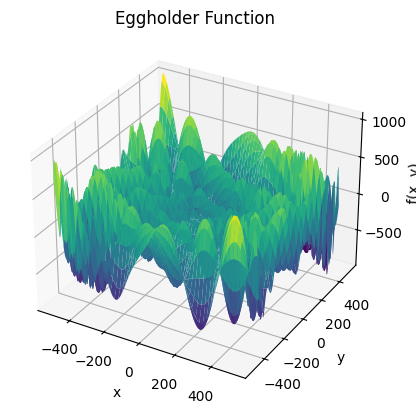

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize, differential_evolution
import time

def eggholder(x):
    return -(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47)))) - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47))))

# Plot the Eggholder function in 3D (over full x,y in [-512,512])
xvals = np.linspace(-512, 512, 300)
yvals = np.linspace(-512, 512, 300)
X, Y = np.meshgrid(xvals, yvals)
Z = eggholder([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Eggholder Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()


We can observe the Eggholder function which is highly non-convex. To keep the visualization and understanding straigthforward we will consider only one of the two design variables. As we know that the minima is for $x=512$ and $y=404.23$ will fix $x$ to this value.

SLSQP from bad init guess: [57.22391134] f= -512.3902641207342
Time (A) SLSQP: 0.0045s
Differential Evolution result: [404.23181045] f= -959.6406627208183
Time (B) Differential Evolution: 0.0211s
Multistart SLSQP best: [-607.65684232] f= -1049.9225423129515
Time (C) Multistart SLSQP: 0.0077s
Multistart SLSQP best: [-607.65684232] f= -1049.9225423129515


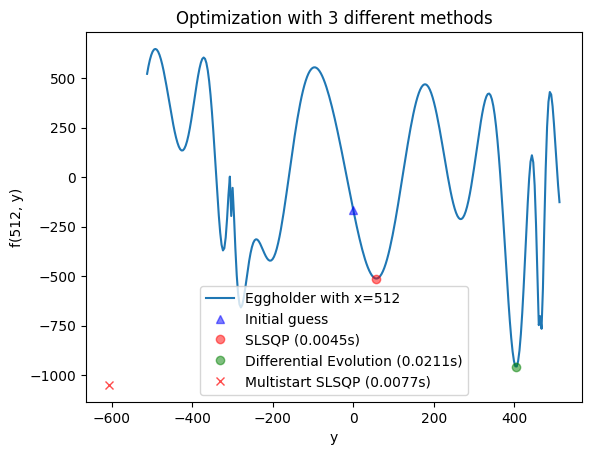

In [9]:
#  We now fix x=512 to demonstrate multiple local minima in 2D
def eggholder_fixed_x(x):
    return eggholder([512, x])

# -- A) Gradient-based from a challenging initial guess
init_guess_bad = [0.0]
start_a = time.time()
res_slsqp_bad = minimize(eggholder_fixed_x, init_guess_bad, method='SLSQP')
end_a = time.time()
time_a = end_a - start_a
print("SLSQP from bad init guess:", res_slsqp_bad.x, "f=", res_slsqp_bad.fun)
print(f"Time (A) SLSQP: {time_a:.4f}s")

# -- B) Differential Evolution (global search) replacing Nelder-Mead
bounds = [(-512, 512)]  # 1D for the second coordinate
start_b = time.time()
res_de = differential_evolution(eggholder_fixed_x, bounds)
end_b = time.time()
time_b = end_b - start_b
print("Differential Evolution result:", res_de.x, "f=", res_de.fun)
print(f"Time (B) Differential Evolution: {time_b:.4f}s")

# -- C) Multistart with SLSQP
best_val = np.inf
best_sol = None
start_c = time.time()
for i in range(10):
    init_guess = np.random.uniform(-512, 512, 1)  # random guess in [-512,512]
    res = minimize(eggholder_fixed_x, init_guess, method='SLSQP')
    if res.fun < best_val:
        best_val = res.fun
        best_sol = res.x
end_c = time.time()
time_c = end_c - start_c
print("Multistart SLSQP best:", best_sol, "f=", best_val)
print(f"Time (C) Multistart SLSQP: {time_c:.4f}s")



print("Multistart SLSQP best:", best_sol, "f=", best_val)

# Plot results
plt.figure()
plt.plot(xvals, eggholder_fixed_x(xvals), label="Eggholder with x=512")

# Show initial guess (bad)
plt.plot(init_guess_bad, eggholder_fixed_x(init_guess_bad[0]),
         'b^', alpha=0.5, label="Initial guess")

# A) SLSQP
plt.plot(res_slsqp_bad.x, res_slsqp_bad.fun,
         'ro', alpha=0.5,
         label=f"SLSQP ({time_a:.4f}s)")

# B) Differential Evolution
plt.plot(res_de.x, res_de.fun,
         'go', alpha=0.5,
         label=f"Differential Evolution ({time_b:.4f}s)")

# C) Multistart SLSQP
plt.plot(best_sol, best_val,
         'rx', alpha=0.7,
         label=f"Multistart SLSQP ({time_c:.4f}s)")
plt.legend()
plt.title("Optimization with 3 different methods")
plt.xlabel("y")
plt.ylabel("f(512, y)")
plt.show()

#### Interior and Boundary Optima

Different types of optimum can appear:
- An optimum is interior if all the constraints are inactive.
- An optimum that is not interior is a limit optimum.

```{figure} ./assets/images/InteriorBoundary.png
---
alt: Interior and Boundary Optima
name: InteriorBoundary
---
Interior and Boundary Optima
```

It is very often the second type of solution that is achieved in an engineering problem. It is therefore important to:
- Analyze whether this constraint is still active. It is then possible to transform the inequality constraint into an equality and include it in the body of the design code.
- Observe the technological limit expressed by this constraint and assess whether other design choices would make it possible to improve the performance of the system.


### Design optimization good practices

#### Monotonicity analysis 

```{admonition} Monotonicity Analysis
Monotonicity analysis was suggested by [Papalambros and Wilde](#References) as a pre-optimization technique to determine if an optimization problem is well-bounded prior to resorting to a numerical optimization task. The technique is based on the following two rules:
**Rule 1**: If the objective function is monotonic with respect to a variable, then there exists at least one active constraint which bounds the variable in the direction opposite to the objective. A constraint is active if it acts at its lower or upper bound.
**Rule 2**: If a variable is not contained in the objective function then it must be either bounded from both above and below by active constraints or not actively bounded at all (that is, any constraint monotonic with respect to that variable must be inactive or irrelevant).
```

#### Dimensions of design variables, objectives and constraints

```{admonition} Tips and Tricks
Here are a few tips for minimizing calculation times during optimization:

**On the optimization variables**
- Minimize their number
- Make sure there are enough of them to meet the various constraints
- Choose variables that can be easily bounded and whose bounds do not depend on a particular case study

**On the optimization objective**
- If necessary for certain algorithms, normalize it around a value close to 1

**On the constraints**
- Minimize the number of constraints, especially equality constraints which can be difficult to respect with certain algorithms (gradient-free)
- If possible, transform an equality constraint into an inequality constraint (by monotonicity analysis) or include it in the dimensioning code by analytical manipulation
- If possible, include inequalities that are still active in the dimensioning code
- If necessary for certain algorithms, normalize the various constraints
```


#### References

> Papalambros, P. Y., & Wilde, D. J. (2000). Principles of optimal design: modeling and computation. Cambridge University Press.